In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

N_BINS = 20

In [3]:
# Can't import the src package without these lines
import sys
sys.path.append("..")

In [4]:
from src.d01_data.db import read_table

# 1. Read relevant tables into dataframes

* `measurement_abstract_rpt`: 1,568,350 final (reported) study measurements (more than measured because some are automatically calculated)
* `a_measgraphref`: 823,886 total (recorded) instance measurements (34,332 with bad `instanceidk` value, 37 with bad `indexinmglist` value)
* `a_measgraphic`: 486,884 instance frames

### `measurement_abstract_rpt`

In [5]:
measurement_abstract_rpt_df = read_table('measurement_abstract_rpt')
print(measurement_abstract_rpt_df.shape)
measurement_abstract_rpt_df.head()

(1568350, 6)


,row_id,studyid,measabstractnumber,name,value,unitname
0,1.0,2882.0,2.0,(P1/2t)AVM,2.491754,cm2
1,2.0,2882.0,12.0,Area TSVI,3.606348,cm2
2,3.0,2882.0,43.0,FE(el-ps4),37.032087,%
3,4.0,2882.0,46.0,FE(MDD-ps4),35.095355,%
4,5.0,2882.0,125.0,P1/2t VM,88.291224,ms


In [6]:
# Remove whitespace around measurement names to match with given measurements that correspond to views (fix units too)
measurement_abstract_rpt_df['name'] = measurement_abstract_rpt_df['name'].str.strip()
measurement_abstract_rpt_df['unitname'] = measurement_abstract_rpt_df['unitname'].str.strip()

### `a_measgraphref`

In [7]:
measgraphref_df = read_table('a_measgraphref')
print(measgraphref_df.shape)
measgraphref_df.head()

(858255, 11)


,row_id,studyidk,measabstractnumber,meassequence,instanceidk,indexinmglist,value,howentered,srinstanceidk,imagesopinstanceuid,measurementuid
0,1.0,2882.0,187.0,0.0,57164,0.0,28.242271,0.0,,,
1,2.0,2882.0,188.0,0.0,57164,0.0,7.897812,0.0,,,
2,3.0,2882.0,189.0,0.0,57164,0.0,85.725750,0.0,,,
3,4.0,2882.0,190.0,0.0,57164,0.0,87.190031,0.0,,,
4,5.0,2882.0,191.0,0.0,57164,1.0,36.654466,0.0,,,


In [8]:
# Drop fields with unknown descriptions in Xcelera documentation
measgraphref_df = measgraphref_df.drop("srinstanceidk", axis="columns")
measgraphref_df.head()

,row_id,studyidk,measabstractnumber,meassequence,instanceidk,indexinmglist,value,howentered,imagesopinstanceuid,measurementuid
0,1.0,2882.0,187.0,0.0,57164,0.0,28.242271,0.0,,
1,2.0,2882.0,188.0,0.0,57164,0.0,7.897812,0.0,,
2,3.0,2882.0,189.0,0.0,57164,0.0,85.725750,0.0,,
3,4.0,2882.0,190.0,0.0,57164,0.0,87.190031,0.0,,
4,5.0,2882.0,191.0,0.0,57164,1.0,36.654466,0.0,,


In [9]:
BAD_INSTANCE_IDKS = ["", "-1"]

In [10]:
len(measgraphref_df[measgraphref_df["instanceidk"].isin(BAD_INSTANCE_IDKS)])

34332

In [11]:
# Drop bad instanceidk from dataframe and cast to int
measgraphref_df = measgraphref_df[~measgraphref_df["instanceidk"].isin(BAD_INSTANCE_IDKS)]
measgraphref_df["instanceidk"] = measgraphref_df["instanceidk"].astype(int)
len(measgraphref_df)

823923

In [12]:
measgraphref_df['indexinmglist'].sort_values().unique()

array([-1.,  0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11.,
       12., 13., 14., 15.])

In [13]:
BAD_INDEX_IN_MG_LIST_VALUES = [-1]

In [14]:
len(measgraphref_df[measgraphref_df["indexinmglist"].isin(BAD_INDEX_IN_MG_LIST_VALUES)])

37

In [15]:
measgraphref_df = measgraphref_df[~measgraphref_df["indexinmglist"].isin(BAD_INDEX_IN_MG_LIST_VALUES)]
len(measgraphref_df)

823886

In [16]:
measgraphref_df["howentered"].unique()

array([0., 3., 5.])

In [17]:
(measgraphref_df["imagesopinstanceuid"] != "").sum()

5111

### `a_measgraphic`

In [18]:
measgraphic_df = read_table('a_measgraphic')
print(measgraphic_df.shape)
measgraphic_df.head()

(486884, 9)


,row_id,instanceidk,indexinmglist,frame,graphictoolidk,longaxisindex,measidk,loopidk,instancerecordtype
0,1.0,57160.0,0.0,0.0,1.0,-1.0,0.0,0.0,False
1,2.0,57160.0,1.0,0.0,2.0,-1.0,0.0,0.0,False
2,3.0,57160.0,2.0,0.0,1.0,-1.0,0.0,0.0,False
3,4.0,57160.0,3.0,0.0,2.0,-1.0,0.0,0.0,False
4,5.0,57162.0,0.0,5.0,2.0,-1.0,0.0,0.0,False


In [19]:
# Drop fields with unknown descriptions in Xcelera documentation
measgraphic_df = measgraphic_df.drop(["graphictoolidk", "longaxisindex", "measidk", "loopidk", "instancerecordtype"], axis="columns")
measgraphic_df.head()

,row_id,instanceidk,indexinmglist,frame
0,1.0,57160.0,0.0,0.0
1,2.0,57160.0,1.0,0.0
2,3.0,57160.0,2.0,0.0
3,4.0,57160.0,3.0,0.0
4,5.0,57162.0,0.0,5.0


# 2. Descriptive Statistics

* 362 unique measurements
* 24,912 unique studies with final (reported) measurements
* 24,471 unique studies with total (recorded) measurements
* 254,159 unique instances with total (recorded) measurements

### What are the most/least common final (reported) measurements?

In [20]:
measurement_abstract_rpt_df['name'].value_counts()

ASC                        22447
Altura (unidad métrica)    21505
Peso (unidad métrica)      21478
IMC                        21447
ASC (Haycock)              21438
Vmáx V2 Ao                 20828
GP máx Ao                  20827
VTD(Teich)                 20623
DVItd                      20623
VTD(cúbico)                20613
SIVtd                      20548
PPVItd                     20430
DSIV/DPPVI                 20309
Masa VI(C)td               20297
Vmáx E VM                  19978
Masa VI (C)ltd             18560
Grosor relativo pared      17856
Vmáx A VM                  17617
E/A VM                     17581
VTD(MDD-ps4)               17547
DVItd ap4                  17519
VTS(MDD-ps4)               17239
FE(MDD-ps4)                17228
VS(MDD-ps4)                17224
DVIts ap4                  17210
VTD(el-ps4)                16665
AVItd ap4                  16664
VTS(el-ps4)                16354
AVIts ap4                  16354
FE(el-ps4)                 16338
          

### What is the distribution of counts for final (reported) measurements?

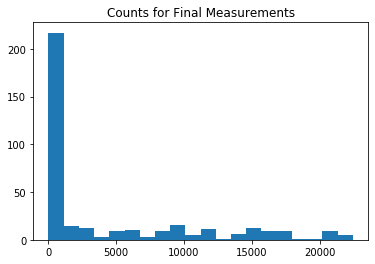

In [21]:
plt.title("Counts for Final Measurements")
final_measurement_counts = measurement_abstract_rpt_df['name'].value_counts().values
plt.hist(final_measurement_counts, N_BINS);

### What is the distribution of counts for final (reported) measurements per study?

In [22]:
final_measurement_counts_per_study = measurement_abstract_rpt_df.groupby("studyid").size()
len(final_measurement_counts_per_study)

24912

In [23]:
final_measurement_counts_per_study.head()

studyid
2882.0    27
2915.0    15
2965.0     5
2966.0    15
3009.0    11
dtype: int64

In [24]:
final_measurement_counts_per_study.describe()

count    24912.000000
mean        62.955604
std         28.507135
min          1.000000
25%         42.000000
50%         60.000000
75%         84.000000
max        146.000000
dtype: float64

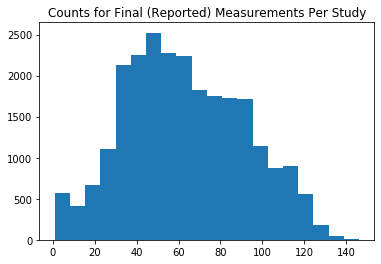

In [25]:
plt.title("Counts for Final (Reported) Measurements Per Study")
plt.hist(final_measurement_counts_per_study.values, N_BINS);

### What is the distribution of counts for total (recorded) measurements per study?

In [26]:
total_measurement_counts_per_study = measgraphref_df.groupby("studyidk").size()
len(total_measurement_counts_per_study)

24471

In [27]:
total_measurement_counts_per_study.head()

studyidk
2882.0    20
2915.0     3
2965.0     5
2966.0    10
3009.0     2
dtype: int64

In [28]:
total_measurement_counts_per_study.describe()

count    24471.000000
mean        33.667852
std         15.882193
min          1.000000
25%         22.000000
50%         33.000000
75%         44.000000
max        148.000000
dtype: float64

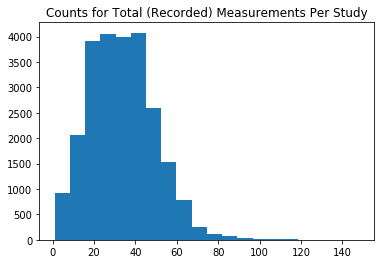

In [29]:
plt.title("Counts for Total (Recorded) Measurements Per Study")
plt.hist(total_measurement_counts_per_study.values, N_BINS);

### What is the distribution of counts for total (recorded) measurements per instance?

In [30]:
total_measurement_counts_per_instance = measgraphref_df.groupby("instanceidk").size()
len(total_measurement_counts_per_instance)

254159

In [31]:
total_measurement_counts_per_instance.head()

instanceidk
57160    4
57162    1
57164    8
57166    5
57169    2
dtype: int64

In [32]:
total_measurement_counts_per_instance.describe()

count    254159.000000
mean          3.241616
std           2.722846
min           1.000000
25%           1.000000
50%           2.000000
75%           5.000000
max          27.000000
dtype: float64

In [33]:
total_measurement_counts_per_instance = total_measurement_counts_per_instance.sort_values(ascending=False)

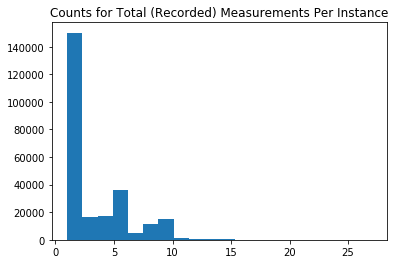

In [34]:
plt.title("Counts for Total (Recorded) Measurements Per Instance")
plt.hist(total_measurement_counts_per_instance.values, N_BINS);

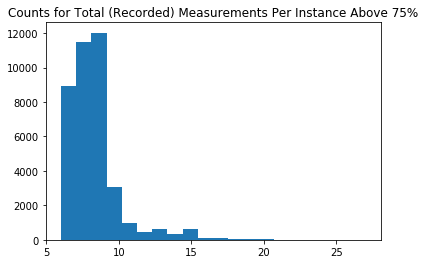

In [35]:
plt.title("Counts for Total (Recorded) Measurements Per Instance Above 75%")
plt.hist(total_measurement_counts_per_instance[total_measurement_counts_per_instance>total_measurement_counts_per_instance.describe()['75%']].values, N_BINS);

### What is the distribution of counts for instances per study?

In [36]:
frame_counts_per_study_and_instance = measgraphref_df.groupby(["studyidk", "instanceidk"]).size()
len(frame_counts_per_study_and_instance)

254159

In [37]:
frame_counts_per_study_and_instance.head()

studyidk  instanceidk
2882.0    57160          4
          57162          1
          57164          8
          57166          5
          57169          2
dtype: int64

In [38]:
instance_counts_per_study = frame_counts_per_study_and_instance.reset_index().groupby('studyidk').size()
len(instance_counts_per_study)

24471

In [39]:
instance_counts_per_study.head()

studyidk
2882.0    5
2915.0    2
2965.0    1
2966.0    2
3009.0    1
dtype: int64

In [40]:
instance_counts_per_study.describe()

count    24471.000000
mean        10.386131
std          4.299754
min          1.000000
25%          7.000000
50%         11.000000
75%         13.000000
max         33.000000
dtype: float64

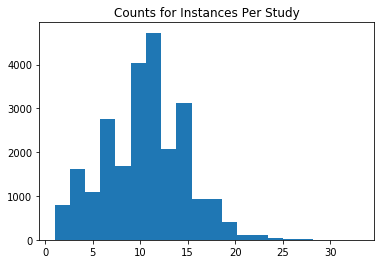

In [41]:
plt.title("Counts for Instances Per Study")
plt.hist(instance_counts_per_study.values, N_BINS);

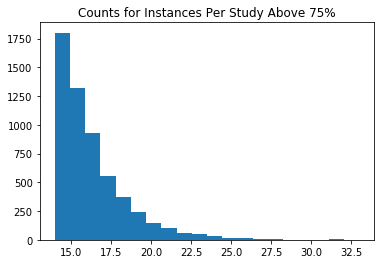

In [42]:
plt.title("Counts for Instances Per Study Above 75%")
plt.hist(instance_counts_per_study[instance_counts_per_study>instance_counts_per_study.describe()['75%']].values, N_BINS);

### What is the distribution of counts for frames per instance?

In [43]:
frame_counts_per_instance = measgraphref_df.groupby(["instanceidk", "indexinmglist"]).size().reset_index().groupby('instanceidk').size()
len(frame_counts_per_instance)

254159

In [44]:
frame_counts_per_instance.head()

instanceidk
57160    4
57162    1
57164    2
57166    2
57169    1
dtype: int64

In [45]:
frame_counts_per_instance.describe()

count    254159.000000
mean          1.915765
std           1.327393
min           1.000000
25%           1.000000
50%           1.000000
75%           2.000000
max          16.000000
dtype: float64

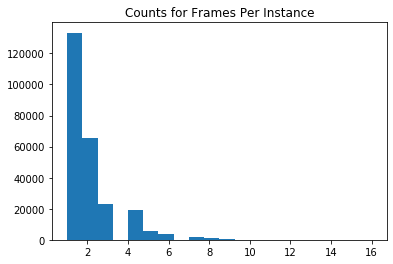

In [46]:
plt.title("Counts for Frames Per Instance")
plt.hist(frame_counts_per_instance.values, N_BINS);

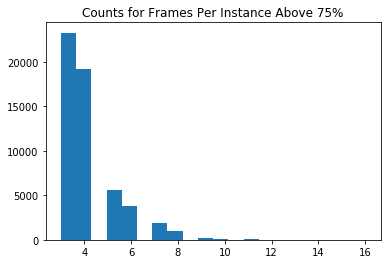

In [47]:
plt.title("Counts for Frames Per Instance Above 75%")
plt.hist(frame_counts_per_instance[frame_counts_per_instance>frame_counts_per_instance.describe()['75%']].values, N_BINS);

### What is the distribution of counts for measurements per frame?

In [48]:
measurement_counts_per_frame = measgraphref_df.groupby(["instanceidk", "indexinmglist"]).size()
len(measurement_counts_per_frame)

486909

In [49]:
measurement_counts_per_frame.head()

instanceidk  indexinmglist
57160        0.0              1
             1.0              1
             2.0              1
             3.0              1
57162        0.0              1
dtype: int64

In [50]:
measurement_counts_per_frame.describe()

count    486909.000000
mean          1.692074
std           1.044359
min           1.000000
25%           1.000000
50%           1.000000
75%           2.000000
max           5.000000
dtype: float64

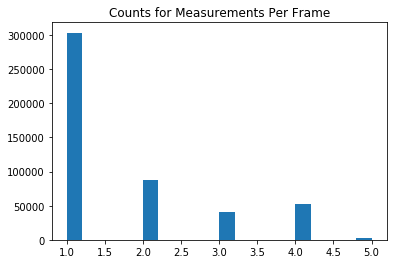

In [51]:
plt.title("Counts for Measurements Per Frame")
plt.hist(measurement_counts_per_frame.values, N_BINS);

# 3. View groundtruth from measurements

* 823,886 total (recorded) instance measurements with frames
* 295,962 total (recorded) instance measurements with frames for measurements we care about
* 23,327 unique studies with total (recorded) measurements for measurements we care about
* 69,185 unique instancs with total (recorded) measurements for measurements we care about
* 162 instances frames with more than one views
* 27,838 instances frames with PLAX view
* 26,014 instances frames with PLAX view potentially
* 38,880 instances frames with A4C view
* 20,908 instances frames with A2C view

In [52]:
measgraphref_df.head()

,row_id,studyidk,measabstractnumber,meassequence,instanceidk,indexinmglist,value,howentered,imagesopinstanceuid,measurementuid
0,1.0,2882.0,187.0,0.0,57164,0.0,28.242271,0.0,,
1,2.0,2882.0,188.0,0.0,57164,0.0,7.897812,0.0,,
2,3.0,2882.0,189.0,0.0,57164,0.0,85.725750,0.0,,
3,4.0,2882.0,190.0,0.0,57164,0.0,87.190031,0.0,,
4,5.0,2882.0,191.0,0.0,57164,1.0,36.654466,0.0,,


In [53]:
measgraphref_df = measgraphref_df[['studyidk', 'measabstractnumber', 'instanceidk', 'indexinmglist']]
measgraphref_df.head()

,studyidk,measabstractnumber,instanceidk,indexinmglist
0,2882.0,187.0,57164,0.0
1,2882.0,188.0,57164,0.0
2,2882.0,189.0,57164,0.0
3,2882.0,190.0,57164,0.0
4,2882.0,191.0,57164,1.0


In [54]:
measgraphic_df.head()

,row_id,instanceidk,indexinmglist,frame
0,1.0,57160.0,0.0,0.0
1,2.0,57160.0,1.0,0.0
2,3.0,57160.0,2.0,0.0
3,4.0,57160.0,3.0,0.0
4,5.0,57162.0,0.0,5.0


In [55]:
measgraphic_df = measgraphic_df[['instanceidk', 'indexinmglist', 'frame']]
measgraphic_df.head()

,instanceidk,indexinmglist,frame
0,57160.0,0.0,0.0
1,57160.0,1.0,0.0
2,57160.0,2.0,0.0
3,57160.0,3.0,0.0
4,57162.0,0.0,5.0


In [56]:
measurement_abstract_rpt_df.head()

,row_id,studyid,measabstractnumber,name,value,unitname
0,1.0,2882.0,2.0,(P1/2t)AVM,2.491754,cm2
1,2.0,2882.0,12.0,Area TSVI,3.606348,cm2
2,3.0,2882.0,43.0,FE(el-ps4),37.032087,%
3,4.0,2882.0,46.0,FE(MDD-ps4),35.095355,%
4,5.0,2882.0,125.0,P1/2t VM,88.291224,ms


In [57]:
measurement_abstract_rpt_df = measurement_abstract_rpt_df[['studyid', 'measabstractnumber', 'name']]
measurement_abstract_rpt_df = measurement_abstract_rpt_df.rename(index=str, columns={"studyid": "studyidk"})
measurement_abstract_rpt_df.head()

,studyidk,measabstractnumber,name
0,2882.0,2.0,(P1/2t)AVM
1,2882.0,12.0,Area TSVI
2,2882.0,43.0,FE(el-ps4)
3,2882.0,46.0,FE(MDD-ps4)
4,2882.0,125.0,P1/2t VM


In [58]:
merge_df = measgraphref_df.merge(measgraphic_df, on=['instanceidk', 'indexinmglist'])
print(merge_df.shape)
merge_df.head()

(823833, 5)


,studyidk,measabstractnumber,instanceidk,indexinmglist,frame
0,2882.0,187.0,57164,0.0,8.0
1,2882.0,188.0,57164,0.0,8.0
2,2882.0,189.0,57164,0.0,8.0
3,2882.0,190.0,57164,0.0,8.0
4,2882.0,191.0,57164,1.0,15.0


In [59]:
merge_df = merge_df.merge(measurement_abstract_rpt_df, on=['studyidk', 'measabstractnumber'])
print(merge_df.shape)
merge_df.head()

(823832, 6)


,studyidk,measabstractnumber,instanceidk,indexinmglist,frame,name
0,2882.0,187.0,57164,0.0,8.0,AVIts ap4
1,2882.0,188.0,57164,0.0,8.0,DVIts ap4
2,2882.0,189.0,57164,0.0,8.0,VTS(el-ps4)
3,2882.0,190.0,57164,0.0,8.0,VTS(MDD-ps4)
4,2882.0,191.0,57164,1.0,15.0,AVItd ap4


In [60]:
MEASUREMENTS_PARASTERNAL_LONG_AXIS_VIEW = ['Diám raíz Ao', 'Diám. Ao asc.', 'Diám TSVI', 'Dimensión AI']
POTENTIAL_MEASUREMENTS_PARASTERNAL_LONG_AXIS_VIEW = ['Diám TSVD', 'DVItd', 'DVIts', 'SIVtd', 'PPVItd']
MEASUREMENTS_APICAL_4_CHAMBER_VIEW = ['AVItd ap4', 'VTD(el-ps4)', 'VTD(MDD-ps4)', 'VTD 4C', 'AVIts ap4', 'VTS(el-ps4)', 'VTS(MDD-ps4)', 'VTS 4C', 'Vol. AI (MOD-sp4)']
MEASUREMENTS_APICAL_2_CHAMBER_VIEW = ['AVItd ap2', 'VTD(el-ps2)', 'VTD(MDD-ps2)', 'VTD 2C', 'AVIts ap2', 'VTS(el-ps2)', 'VTS(MDD-ps2)', 'VTS 2C', 'Vol. AI (MOD-sp2)']
ALL_MEASUREMENTS = MEASUREMENTS_PARASTERNAL_LONG_AXIS_VIEW + POTENTIAL_MEASUREMENTS_PARASTERNAL_LONG_AXIS_VIEW + MEASUREMENTS_APICAL_4_CHAMBER_VIEW + MEASUREMENTS_APICAL_2_CHAMBER_VIEW

In [61]:
filter_df = merge_df[merge_df.name.isin(ALL_MEASUREMENTS)].copy()
print(filter_df.shape)
filter_df.head()

(295962, 6)


,studyidk,measabstractnumber,instanceidk,indexinmglist,frame,name
0,2882.0,187.0,57164,0.0,8.0,AVIts ap4
2,2882.0,189.0,57164,0.0,8.0,VTS(el-ps4)
3,2882.0,190.0,57164,0.0,8.0,VTS(MDD-ps4)
4,2882.0,191.0,57164,1.0,15.0,AVItd ap4
6,2882.0,193.0,57164,1.0,15.0,VTD(el-ps4)


In [62]:
filtered_measurements = filter_df['name']
filtered_measurements.value_counts()

DVItd                21102
SIVtd                21007
PPVItd               20776
AVItd ap4            17215
VTD(el-ps4)          17214
VTD(MDD-ps4)         17213
AVIts ap4            16778
VTS(el-ps4)          16777
VTS(MDD-ps4)         16776
Diám raíz Ao         15916
Dimensión AI         13149
Vol. AI (MOD-sp4)    12255
DVIts                11594
AVItd ap2             9370
VTD(el-ps2)           9369
VTD(MDD-ps2)          9368
AVIts ap2             9238
VTS(el-ps2)           9237
VTS(MDD-ps2)          9236
Vol. AI (MOD-sp2)     7625
Diám TSVI             6899
Diám. Ao asc.         5078
Diám TSVD             2559
VTD 4C                  55
VTS 2C                  53
VTD 2C                  52
VTS 4C                  51
Name: name, dtype: int64

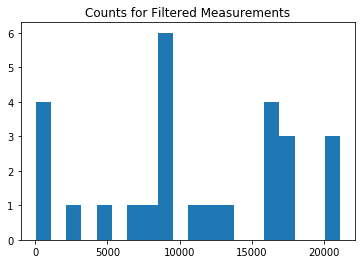

In [63]:
plt.title("Counts for Filtered Measurements")
plt.hist(filtered_measurements.value_counts().values, N_BINS);

In [64]:
len(filter_df.groupby(['studyidk']).size())

23327

In [65]:
len(filter_df.groupby(['instanceidk']).size())

69185

In [66]:
filter_df['is_plax'] = filter_df['name'].isin(MEASUREMENTS_PARASTERNAL_LONG_AXIS_VIEW)
filter_df['maybe_plax'] = filter_df['name'].isin(POTENTIAL_MEASUREMENTS_PARASTERNAL_LONG_AXIS_VIEW)
filter_df['is_a4c'] = filter_df['name'].isin(MEASUREMENTS_APICAL_4_CHAMBER_VIEW)
filter_df['is_a2c'] = filter_df['name'].isin(MEASUREMENTS_APICAL_2_CHAMBER_VIEW)

In [67]:
filter_df['view'] = ''
filter_df.loc[filter_df['is_plax']==True, 'view'] = 'plax'
filter_df.loc[filter_df['maybe_plax']==True, 'view'] = 'plax'
filter_df.loc[filter_df['is_a4c']==True, 'view'] = 'a4c'
filter_df.loc[filter_df['is_a2c']==True, 'view'] = 'a2c'

In [68]:
group_df = filter_df.groupby(['instanceidk', 'frame']).first()
group_df = group_df.drop(['measabstractnumber', 'name'], axis='columns')
print(group_df.shape)
group_df.head()

(113640, 7)


studyidk  indexinmglist  is_plax  maybe_plax  is_a4c  \
instanceidk frame                                                         
57162       5.0      2882.0            0.0     True       False   False   
57164       8.0      2882.0            0.0    False       False    True   
            15.0     2882.0            1.0    False       False    True   
57571       0.0      2915.0            0.0    False        True   False   
58204       18.0     2966.0            0.0     True       False   False   

                   is_a2c  view  
instanceidk frame                
57162       5.0     False  plax  
57164       8.0     False   a4c  
            15.0    False   a4c  
57571       0.0     False  plax  
58204       18.0    False  plax

In [69]:
(group_df.reset_index().groupby(['instanceidk', 'indexinmglist'])['view'].nunique().eq(1)==False).sum()

0

In [70]:
(group_df.reset_index().groupby('instanceidk')['view'].nunique().eq(1)==False).sum()

162

In [71]:
is_instance_multiview = (group_df.reset_index().groupby('instanceidk')['view'].nunique().eq(1)==False).reset_index()
is_instance_multiview = is_instance_multiview.rename(index=str, columns={"view": "is_multiview"})

In [72]:
group_df = group_df.merge(is_instance_multiview, on='instanceidk')

In [73]:
group_df['is_plax'].sum()

27838

In [74]:
group_df['maybe_plax'].sum()

26014

In [75]:
group_df['is_a4c'].sum()

38880

In [76]:
group_df['is_a2c'].sum()

20908

In [77]:
frames_with_views_df = group_df
frames_with_views_df.to_csv('frames_with_views.csv')